# IMPORTING PYTHON LIBRARIES

In [1]:
# Importing necessary libraries for analysing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# LOADING DATASETS USING PANDAS

In [2]:
# Loading dataset
nyc_airbnb = pd.read_csv(r"C:/Users/asus/Downloads/archive (1)/AB_NYC_2019.csv")


In [3]:
# Viewing the first 5 rows of the dataset
nyc_airbnb.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Describing the dataset
nyc_airbnb.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
# Checking the shape of the dataset
print(f'The shape of the NYC Airbnb dataset is {nyc_airbnb.shape}')


The shape of the NYC Airbnb dataset is (48895, 16)


In [6]:
# Checking the feature names
print('The feature names in the dataset are:')
list(nyc_airbnb.columns)


The feature names in the dataset are:


['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [7]:
# Identifying categorical columns
categorical_columns = nyc_airbnb.select_dtypes(include='object').columns
print(f'The categorical features in the dataset are: {list(categorical_columns)}')


The categorical features in the dataset are: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [8]:
# Identifying numeric (non-categorical) columns
numeric_columns = nyc_airbnb.select_dtypes(exclude='object').columns
print('The numeric (non-categorical) features in the dataset are:')
list(numeric_columns)


The numeric (non-categorical) features in the dataset are:


['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [9]:
# Displaying information about the dataset
nyc_airbnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## HANDLING MISSING DATA


In [10]:
# Checking for null values
print('The missing values before data cleaning are:')
nyc_airbnb.isnull().sum()


The missing values before data cleaning are:


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# Displaying the count of missing values
print(nyc_airbnb.isnull().sum())  # To check for missing values


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [12]:
# Dropping unnecessary columns with error handling
cleaned_airbnb_data = nyc_airbnb.drop(['last_review', 'reviews_per_month'], axis=1, errors='ignore')


cleaned_airbnb_data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


## EXPLORATORY DATA ANALYSIS

In [13]:
# Identifying hosts with the most listings by neighbourhood
host_areas = cleaned_airbnb_data.groupby(['host_name', 'neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(9)
top_hosts


,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1833,Blueground,Brooklyn,232
1834,Blueground,Manhattan,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103
7478,Kazuya,Brooklyn,103
7479,Kazuya,Manhattan,103
6540,Jeremy & Laura,Manhattan,96
13216,Sonder,Manhattan,96


#### Based on the results, the host with the highest number of listings is Sonder (NYC), boasting a total of 327 listings located in Manhattan.

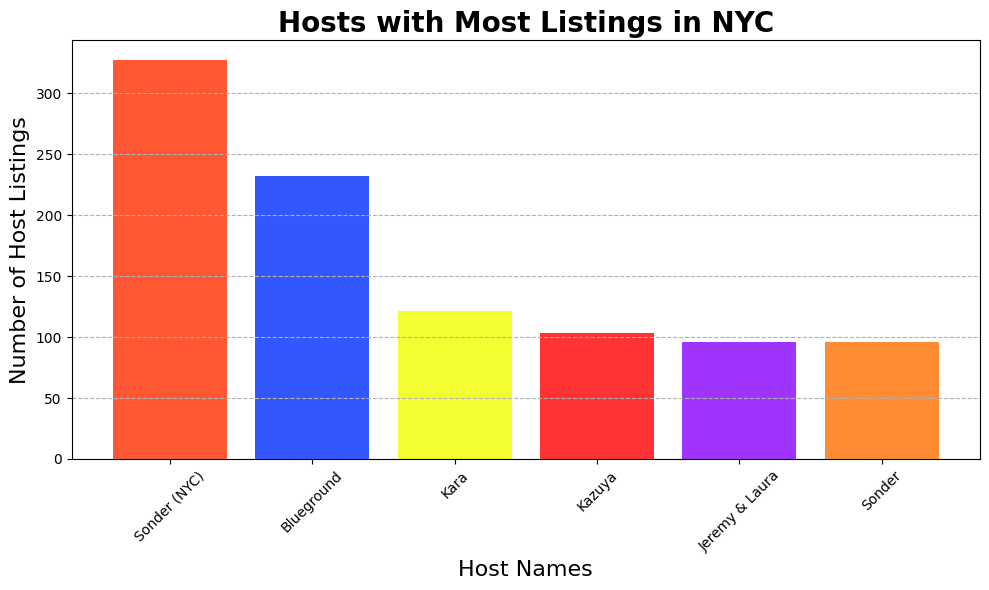

In [14]:
# Visualizing the hosts with most listings
plt.rcParams['figure.figsize'] = (10, 6)  
host_name = top_hosts['host_name']
host_listings = top_hosts['calculated_host_listings_count']
plt.bar(host_name, host_listings, color=['#FF5733', '#33FF57', '#3357FF', '#F3FF33', '#FF33A1', '#33FFF0', '#FF3333', '#A133FF', '#FF8C33'])
plt.title('Hosts with Most Listings in NYC', fontsize=20, fontweight='bold')  
plt.xlabel('Host Names', fontsize=16)
plt.ylabel('Number of Host Listings', fontsize=16)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--') 
plt.tight_layout() 
plt.show()


In [15]:
# Finding the neighbourhood with the maximum number of reviews
neighbourhood_reviews = cleaned_airbnb_data.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by='number_of_reviews', ascending=False)
neighbourhood_reviews


,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


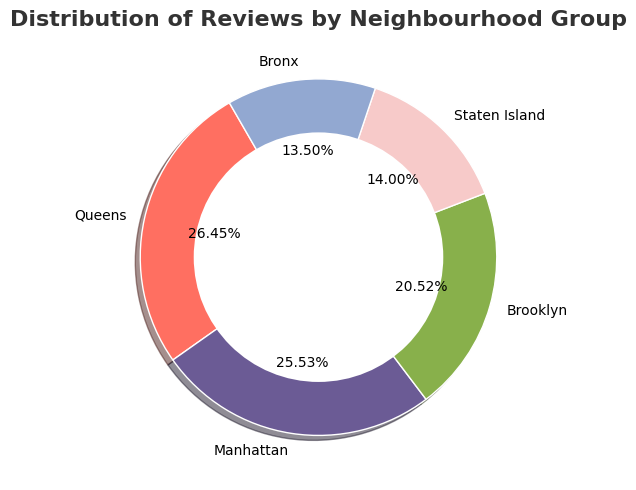

In [16]:
# Visualizing the number of reviews in each neighbourhood group using donut chart
plt.rcParams['figure.figsize'] = (6, 5)
reviews = neighbourhood_reviews['number_of_reviews']
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']
explode_values = [0, 0, 0, 0, 0]
plt.pie(reviews, labels=neighbourhood_reviews['neighbourhood_group'], autopct='%0.2f%%', startangle=120, explode=explode_values, colors=colors, shadow=True, wedgeprops={'width': 0.35, 'edgecolor': 'w'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Distribution of Reviews by Neighbourhood Group', fontsize=16, fontweight='bold', color='#333333')
plt.tight_layout()
plt.show()


#### The chart above illustrates the percentage share of reviews across various neighborhood groups. It indicates that Queens and Manhattan account for the highest number of reviews, suggesting that residents appreciate living in these areas. Consequently, these neighborhoods contribute significantly to the company's revenue

In [17]:
# Checking the descriptive statistics of the dataset
cleaned_airbnb_data.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


### Based on the summary statistics, the average price of listings is $152.72, with an average minimum stay of 7.03 nights and an average of 23.27 reviews per listing. Additionally, hosts typically have around 7.14 properties listed, while the average availability is approximately 112.78 vacant days per year.
 
 ### Notably, the minimum price recorded is 0 and the maximum price reaches $10,000, indicating potential issues within the data. Therefore, further investigation is necessary to identify and address any outliers

In [18]:
# Checking for outliers in the 'price' column using aggregate functions
cleaned_airbnb_data.agg({'price': ['mean', 'median', 'max', 'count']})


,price
mean,152.720687
median,106.000000
max,10000.000000
count,48895.000000


In [19]:
# Grouping the data by neighbourhood group and calculating the required statistics
price_stats = cleaned_airbnb_data.groupby('neighbourhood_group')['price'].describe()


quartiles = cleaned_airbnb_data.groupby('neighbourhood_group')['price'].quantile([0.25, 0.5, 0.75]).unstack()
min_values = cleaned_airbnb_data.groupby('neighbourhood_group')['price'].min()
max_values = cleaned_airbnb_data.groupby('neighbourhood_group')['price'].max()
iqr = quartiles[0.75] - quartiles[0.25]


boxplot_stats = pd.DataFrame({
    'Min': min_values,
    'Q1 (25%)': quartiles[0.25],
    'Median (50%)': quartiles[0.5],
    'Q3 (75%)': quartiles[0.75],
    'Max': max_values,
    'IQR': iqr
})

boxplot_stats


,Min,Q1 (25%),Median (50%),Q3 (75%),Max,IQR
neighbourhood_group,,,,,,
Bronx,0,45.0,65.0,99.0,2500,54.0
Brooklyn,0,60.0,90.0,150.0,10000,90.0
Manhattan,0,95.0,150.0,220.0,10000,125.0
Queens,10,50.0,75.0,110.0,10000,60.0
Staten Island,13,50.0,75.0,110.0,5000,60.0


#### The minimum price of zero and maximum price of 10,000 in the dataset raise concerns about data integrity, as there are no available Airbnb rooms. The mean price being significantly higher than the median indicates a right skew, likely due to a few high-priced listings. A boxplot can effectively illustrate the pricing distribution, highlighting the median, quartiles, and potential outliers, which will help identify any extreme values in the dataset.

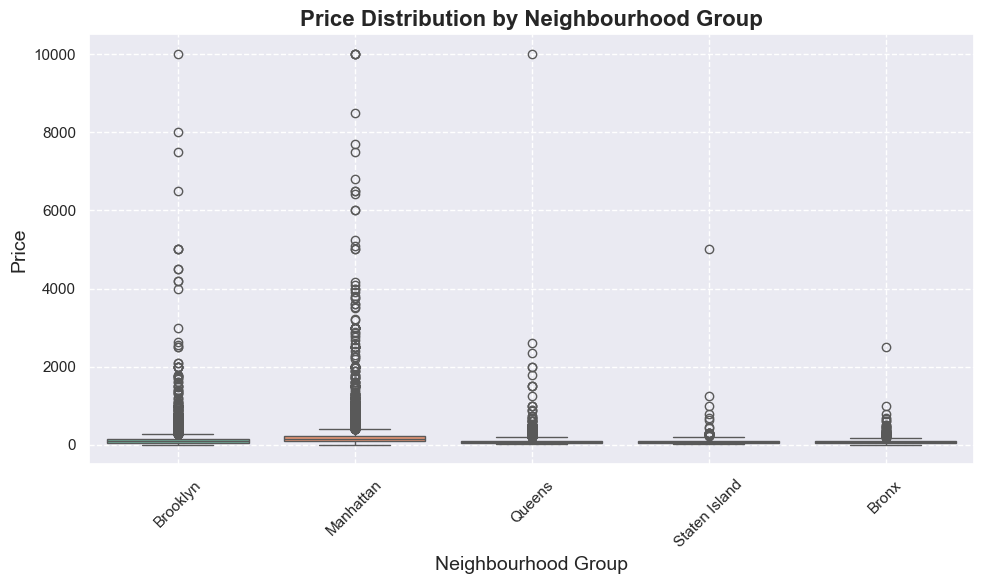

In [20]:
# Plotting the boxplot for price distribution by neighbourhood group
plt.figure(figsize=(10, 6))
sns.set_theme(style='darkgrid') 

ax = sns.boxplot(x='neighbourhood_group', y='price', data=cleaned_airbnb_data, hue='neighbourhood_group', palette='Set2')
ax.set_title('Price Distribution by Neighbourhood Group', fontsize=16, fontweight='bold')
ax.set_xlabel('Neighbourhood Group', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--')
plt.tight_layout()  # To prevent label overlap
plt.show()


##### We found some outliers in the data. To fix this, we will use a method called flooring and capping based on percentiles. First, let's look at the 10th and 90th percentiles of the price column."

In [21]:
# Calculating the 10th percentile (low quantile) for price
low_quantile = cleaned_airbnb_data['price'].quantile(0.10)
print(f'The low quantile (10th percentile) for price is: {low_quantile}')


The low quantile (10th percentile) for price is: 49.0


In [22]:
# Calculating the high quantile (90th percentile) for price
high_quantile = cleaned_airbnb_data['price'].quantile(0.90)
print(f'The high quantile (90th percentile) for price is: {high_quantile}')


The high quantile (90th percentile) for price is: 269.0


##### The 10th percentile is 49 and 90th percentile is 269. Since we're looking at Airbnb listings, it's normal to see some very expensive places, especially luxurious ones. Because outliers can affect our calculations, we'll remove prices that fall outside the range of 49 to 269.

In [23]:
# Removing the values below the 10th percentile and above the 90th percentile
cleaned_airbnb_data = cleaned_airbnb_data.drop(cleaned_airbnb_data[cleaned_airbnb_data['price'] < low_quantile].index)
cleaned_airbnb_data = cleaned_airbnb_data.drop(cleaned_airbnb_data[cleaned_airbnb_data['price'] > high_quantile].index)


In [24]:
# Grouping the data by neighbourhood group and calculating price statistics
price_stats = cleaned_airbnb_data.groupby('neighbourhood_group')['price'].agg(['mean', 'median', 'min', 'max', 'count', 'std']).reset_index()
price_stats.columns = ['Neighbourhood Group', 'Mean Price', 'Median Price', 'Min Price', 'Max Price', 'Count', 'Standard Deviation']
print(price_stats)

# Finding outliers based on price
q_low = cleaned_airbnb_data['price'].quantile(0.10)
q_high = cleaned_airbnb_data['price'].quantile(0.90)

# Filtering the data to remove outliers
filtered_data = cleaned_airbnb_data[(cleaned_airbnb_data['price'] >= q_low) & (cleaned_airbnb_data['price'] <= q_high)]

# Recalculating statistics on the filtered data
filtered_price_stats = filtered_data.groupby('neighbourhood_group')['price'].agg(['mean', 'median', 'min', 'max', 'count', 'std']).reset_index()
filtered_price_stats.columns = ['Neighbourhood Group', 'Mean Price', 'Median Price', 'Min Price', 'Max Price', 'Count', 'Standard Deviation']

# Displaying the filtered price statistics
print(filtered_price_stats)


  Neighbourhood Group  Mean Price  Median Price  Min Price  Max Price  Count  \
0               Bronx   89.456464          79.0         49        250    758   
1            Brooklyn  110.887620          99.0         49        269  16373   
2           Manhattan  138.378804         130.0         49        269  17513   
3              Queens   97.330614          84.0         49        268   4413   
4       Staten Island   96.798561          84.0         49        250    278   

   Standard Deviation  
0           38.381456  
1           51.491543  
2           57.273828  
3           46.281762  
4           45.092633  
  Neighbourhood Group  Mean Price  Median Price  Min Price  Max Price  Count  \
0               Bronx   95.250412          85.0         60        200    607   
1            Brooklyn  111.354937         100.0         60        200  13408   
2           Manhattan  126.609511         122.0         60        200  14236   
3              Queens  102.300262          93.0        

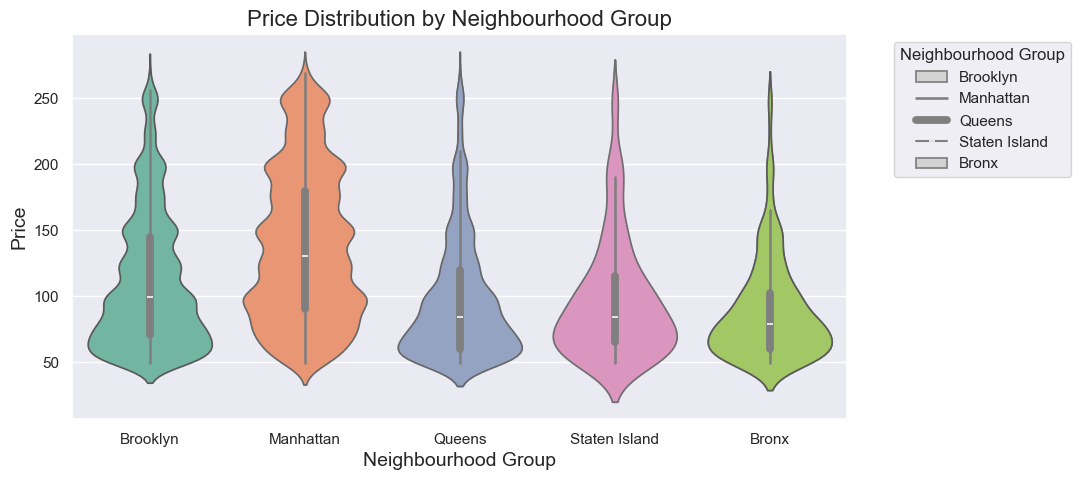

In [25]:
# Violin Plot on the basis of Price Distribution by Neighbourhood Group
plt.figure(figsize=(10, 5))
colors = sns.color_palette("Set2", n_colors=cleaned_airbnb_data['neighbourhood_group'].nunique())
sns.violinplot(x='neighbourhood_group', y='price', data=cleaned_airbnb_data, dodge=False, color='lightgray')  # Base colo
for i, neighbourhood in enumerate(cleaned_airbnb_data['neighbourhood_group'].unique()):
    sns.violinplot(x='neighbourhood_group', y='price', data=cleaned_airbnb_data[cleaned_airbnb_data['neighbourhood_group'] == neighbourhood],
                   color=colors[i], inner=None, dodge=False)
plt.title('Price Distribution by Neighbourhood Group', fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Neighbourhood Group', fontsize=14)
plt.legend(title='Neighbourhood Group', labels=cleaned_airbnb_data['neighbourhood_group'].unique(), 
           loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


#### The violin plot shows that Manhattan has the highest rental prices, making it the most expensive area. Brooklyn has the second-highest prices, while the Bronx is the most affordable option."

# IDENTIFYING THE BUSIEST HOSTS

In [26]:
# Identifying the busiest hosts based on the maximum number of reviews.
busiest_hosts = (cleaned_airbnb_data.groupby(['host_name', 'host_id', 'room_type', 'neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by='number_of_reviews', ascending=False).head(10))
busiest_hosts


,host_name,host_id,room_type,neighbourhood_group,number_of_reviews
14715,Jj,4734398,Private room,Manhattan,607
5180,Carol,2369681,Private room,Manhattan,540
3266,Asa,12949460,Entire home/apt,Brooklyn,488
31439,Wanda,792159,Private room,Brooklyn,480
18672,Linda,2680820,Private room,Queens,474
7162,Dani,42273,Entire home/apt,Brooklyn,467
2420,Angela,23591164,Private room,Queens,466
451,Agnes,277379,Private room,Manhattan,458
14959,John,2267153,Private room,Manhattan,451
8196,Dennis & Naoko,307962,Entire home/apt,Queens,441


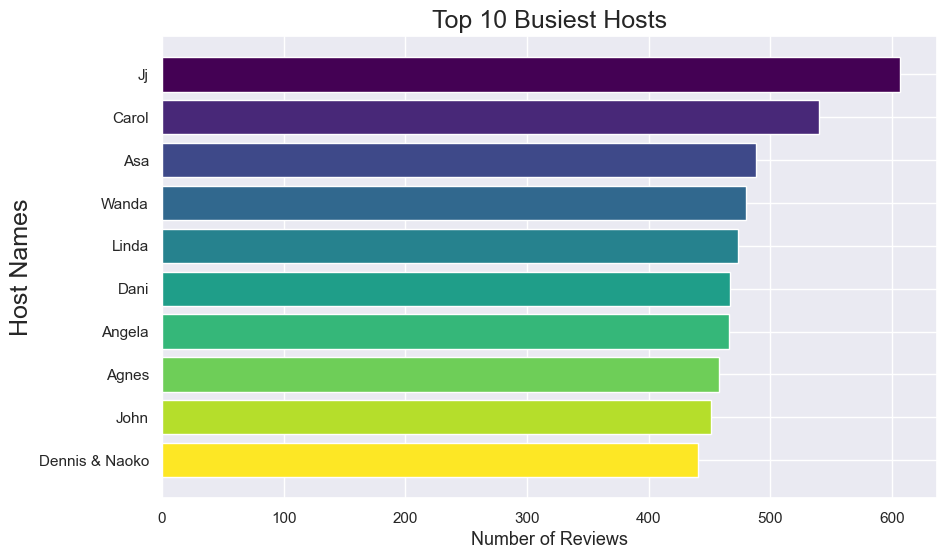

In [27]:
# Creating a horizontal stacked bar plot for the busiest hosts
plt.figure(figsize=(10, 6))
reviews = busiest_hosts['number_of_reviews']
colors = plt.cm.viridis(np.linspace(0, 1, len(busiest_hosts)))
plt.barh(busiest_hosts['host_name'], reviews, color=colors)
plt.title('Top 10 Busiest Hosts', fontsize=18)  
plt.xlabel('Number of Reviews', fontsize=13)  
plt.ylabel('Host Names', fontsize=18) 
plt.gca().invert_yaxis()  
plt.show() 

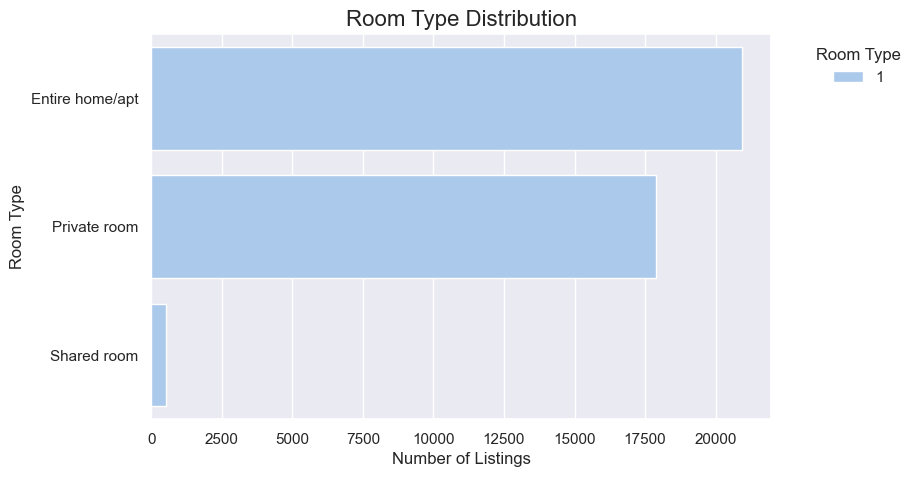

In [28]:
cleaned_airbnb_data['dummy_hue'] = 1
plt.figure(figsize=(8, 5))
sns.countplot(y='room_type', data=cleaned_airbnb_data, palette='pastel', hue='dummy_hue', dodge=False, order=cleaned_airbnb_data['room_type'].value_counts().index)
plt.title('Room Type Distribution', fontsize=16)
plt.xlabel('Number of Listings', fontsize=12)
plt.ylabel('Room Type', fontsize=12)
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.show()


##### Looking at the result above, we can conclude that the top 5 Busiest Hosts are:
 ### Ji, Carol, Asa, Wanda,Linda

### The above mentioned hosts are busiest because they host Entire home/apt and private room which are the most preferred room types according to above histogram plot.

### Most Popular Rooms in the Neighbourhood

In [29]:
# Finding the top 10 neighborhoods with the most listings
top_neighbourhoods = cleaned_airbnb_data.groupby(['neighbourhood'])['id'].count().nlargest(10)
top_neighbourhoods


neighbourhood
Williamsburg          3415
Bedford-Stuyvesant    2963
Harlem                2311
Bushwick              1846
Upper West Side       1619
East Village          1590
Hell's Kitchen        1576
Upper East Side       1561
Crown Heights         1257
Midtown               1002
Name: id, dtype: int64

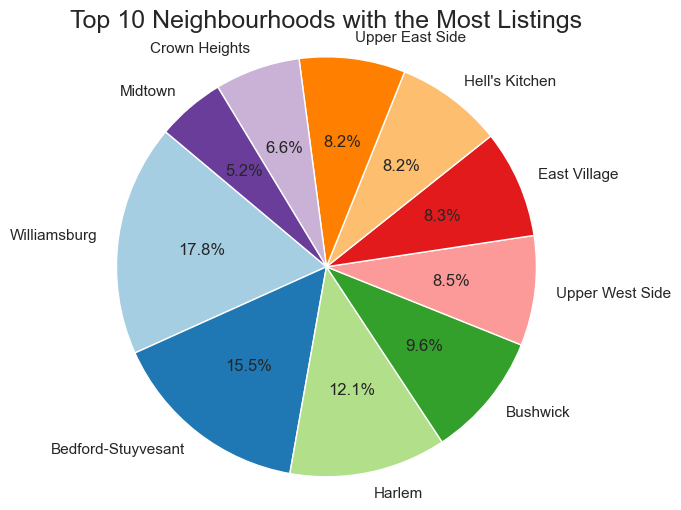

In [30]:
plt.figure(figsize=(8, 6))
plt.pie(top_neighbourhoods, labels=top_neighbourhoods.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 10 Neighbourhoods with the Most Listings", fontsize=18)
plt.axis('equal')
plt.show()


#### The neighborhoods with the most listings are in Manhattan and Brooklyn, as tourists often prefer these areas. Williamsburg in Brooklyn leads with 3,415 listings, while Bedford-Stuyvesant in Manhattan has 2,311 listings

In [31]:
top_reviews = cleaned_airbnb_data.groupby(['neighbourhood_group', 'neighbourhood', 'room_type'])['number_of_reviews'].max().reset_index().sort_values(by='number_of_reviews', ascending=False).head(10)
top_reviews


,neighbourhood_group,neighbourhood,room_type,number_of_reviews
255,Manhattan,Harlem,Private room,607
270,Manhattan,Lower East Side,Private room,540
196,Brooklyn,Park Slope,Entire home/apt,488
132,Brooklyn,Bushwick,Private room,480
358,Queens,Flushing,Private room,474
212,Brooklyn,South Slope,Entire home/apt,467
348,Queens,East Elmhurst,Private room,466
241,Manhattan,East Village,Private room,451
318,Queens,Astoria,Entire home/apt,441
419,Queens,Springfield Gardens,Entire home/apt,434


The most popular neighbourhood is Harlem which is situated in Manhattan and the room type prefered here is Private Room.



## Key Findings:
1. Manhattan has the highest number of listings, followed by Brooklyn, with Staten Island having the fewest.
2. Together, Manhattan and Brooklyn account for 87% of NYC's listings.
3. Brooklyn and Manhattan are the most popular neighborhoods.
4. Queens has significantly fewer host listings than Manhattan, indicating a need for efforts to boost listings in Queens.
5. There is a high demand for private rooms and entire homes/apartments, with a preference for more affordable rentals.

### Conclusion:

Our analysis shows that Manhattan leads in both the number of listings and rental prices, largely due to its popularity among tourists visiting its many attractions. Brooklyn ranks second, offering a significant number of listings at more affordable prices compared to Manhattan. 

In contrast, neighborhoods like Queens, the Bronx, and Staten Island have fewer options, especially Staten Island, which is more residential. Guests may choose these areas for cost savings or to visit family and friends.

For a deeper exploration, additional features, such as positive and negative reviews, would have been beneficial to better understand each neighborhood's popularity.